## Base Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

In [2]:
spam_df = pd.read_csv('emails.csv')

In [3]:
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Plot the data

<Axes: xlabel='spam', ylabel='count'>

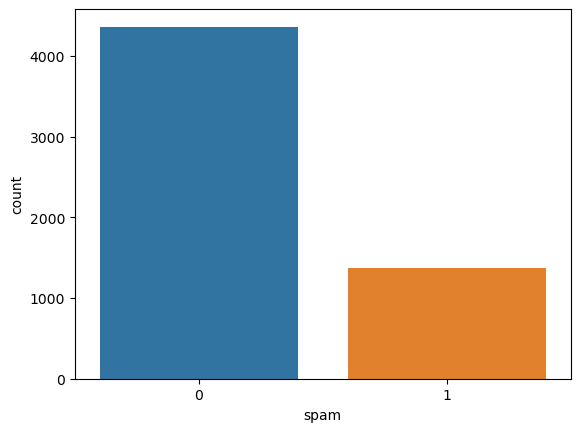

In [7]:
sns.countplot(data=spam_df, x='spam')

## Prepare data for machine learning

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [9]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df.text)

In [10]:
X_train_val, X_test, y_train_val, y_test = train_test_split(spamham_countvectorizer, spam_df.spam, test_size = 0.2, random_state = 40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 40)



## Apply machine learing alogrithms to the model

### Create models

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


multi_nb = MultinomialNB()
bern_nb = BernoulliNB()
svc = SVC()
log_reg = LogisticRegression()
rnd_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()

In [12]:
models = [multi_nb, bern_nb, svc, log_reg, rnd_forest,grad_boost, knn, mlp ]

### Method for model evaluation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
def model_report(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d')
    print(model.__class__.__name__)
    plt.show()
    print(classification_report(y_val, predictions))
    print()
    print()
    

### MultinomialNB

MultinomialNB


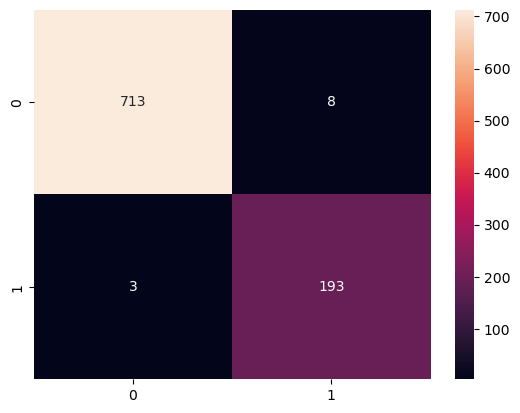

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       721
           1       0.96      0.98      0.97       196

    accuracy                           0.99       917
   macro avg       0.98      0.99      0.98       917
weighted avg       0.99      0.99      0.99       917





In [15]:
model_report(multi_nb, X_train, X_val, y_train, y_val)

### BernoulliNB

BernoulliNB


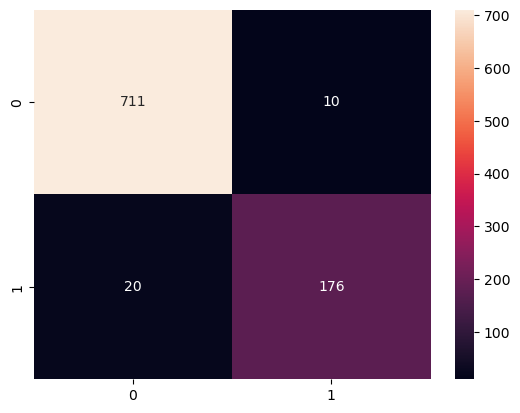

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.95      0.90      0.92       196

    accuracy                           0.97       917
   macro avg       0.96      0.94      0.95       917
weighted avg       0.97      0.97      0.97       917





In [16]:
model_report(bern_nb, X_train, X_val, y_train, y_val)

### SVC

SVC


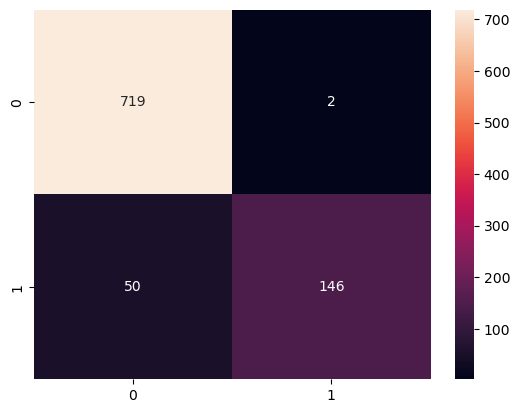

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       721
           1       0.99      0.74      0.85       196

    accuracy                           0.94       917
   macro avg       0.96      0.87      0.91       917
weighted avg       0.95      0.94      0.94       917





In [17]:
model_report(svc, X_train, X_val, y_train, y_val)

### LogisticRegression

LogisticRegression


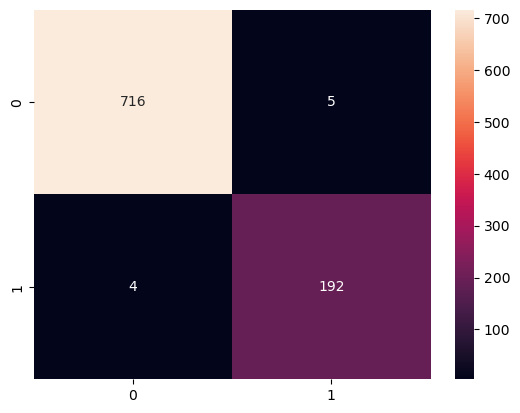

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       721
           1       0.97      0.98      0.98       196

    accuracy                           0.99       917
   macro avg       0.98      0.99      0.99       917
weighted avg       0.99      0.99      0.99       917





In [18]:
model_report(log_reg, X_train, X_val, y_train, y_val)

### RandomForestClassifier

RandomForestClassifier


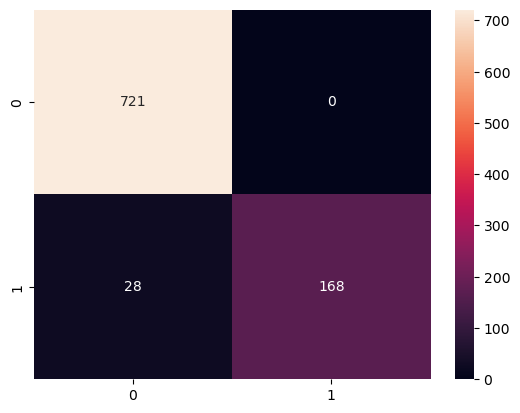

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       721
           1       1.00      0.86      0.92       196

    accuracy                           0.97       917
   macro avg       0.98      0.93      0.95       917
weighted avg       0.97      0.97      0.97       917





In [19]:
model_report(rnd_forest, X_train, X_val, y_train, y_val)

### GradientBoostingClassifier

GradientBoostingClassifier


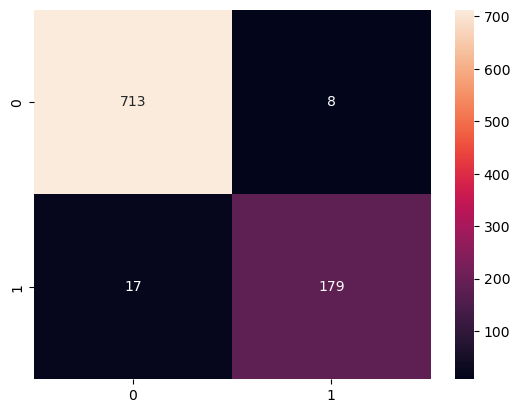

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       721
           1       0.96      0.91      0.93       196

    accuracy                           0.97       917
   macro avg       0.97      0.95      0.96       917
weighted avg       0.97      0.97      0.97       917





In [20]:
model_report(grad_boost, X_train, X_val, y_train, y_val)

### KNeighborsClassifier

KNeighborsClassifier


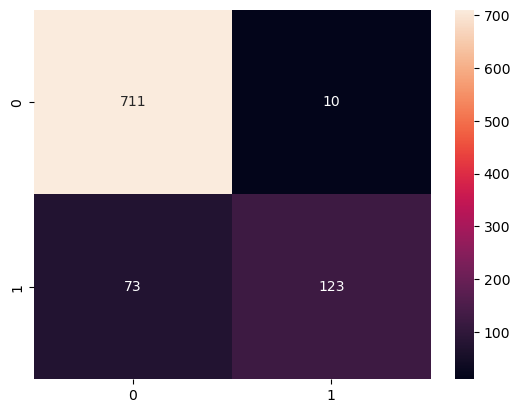

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       721
           1       0.92      0.63      0.75       196

    accuracy                           0.91       917
   macro avg       0.92      0.81      0.85       917
weighted avg       0.91      0.91      0.90       917





In [21]:
model_report(knn, X_train, X_val, y_train, y_val)

### MLPClassifier

MLPClassifier


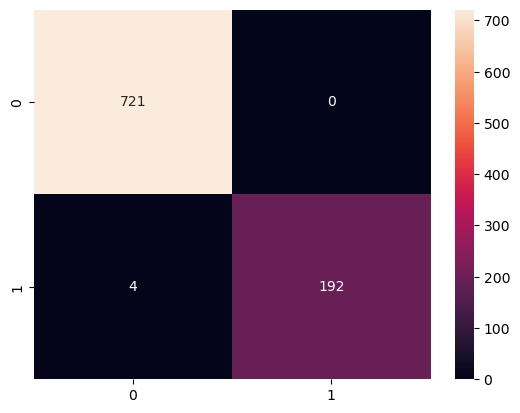

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       721
           1       1.00      0.98      0.99       196

    accuracy                           1.00       917
   macro avg       1.00      0.99      0.99       917
weighted avg       1.00      1.00      1.00       917





In [22]:
model_report(mlp, X_train, X_val, y_train, y_val)

## Hyperparameter tuning

### Since logistic regression and multinomial naive bayes performed the best, I will tune their hyperparamters, the neural network model also performed very well, but I will not be tuning it's hyperparamters because of the long training time

In [23]:
from sklearn.model_selection import GridSearchCV

### Multinomial Naive Bayes

In [ ]:
param_grid_multi_nb = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search_multi_nb = GridSearchCV(MultinomialNB(), param_grid_multi_nb, cv=5)
grid_search_multi_nb.fit(X_train, y_train)

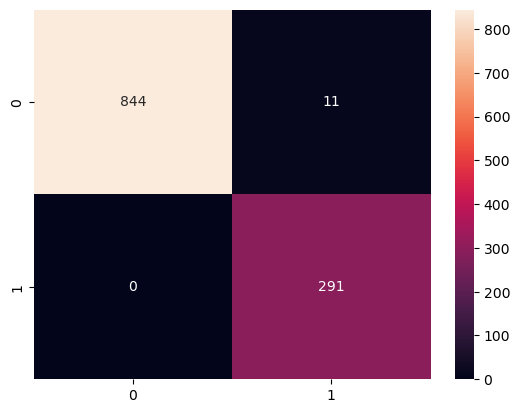

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       855
           1       0.96      1.00      0.98       291

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [29]:
predictions = grid_search_multi_nb.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()
print(classification_report(y_test, predictions))

### Logistic Regression

In [25]:
param_grid_log_reg = param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear', 'lbfgs']       
}
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter = 100), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)

C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ritik\AppData\Roaming\Python\Python311\site-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

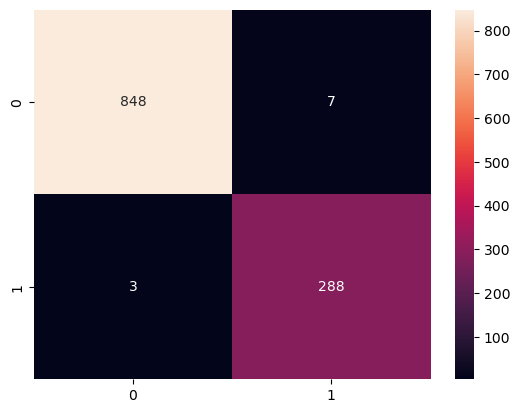

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       855
           1       0.98      0.99      0.98       291

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [30]:
predictions = grid_search_log_reg.best_estimator_.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()
print(classification_report(y_test, predictions))

### MLP

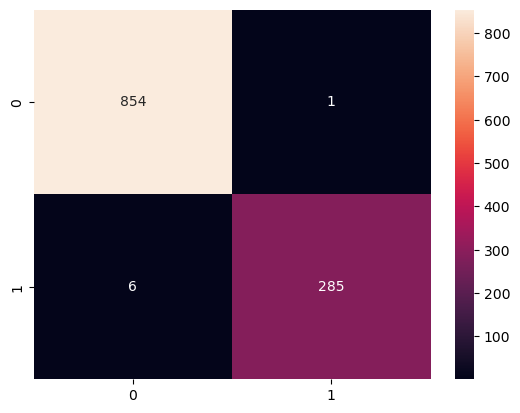

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       855
           1       1.00      0.98      0.99       291

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [31]:
predictions = mlp.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()
print(classification_report(y_test, predictions))

### Three accuarate models have been created because accuracy, precision, and recall between all models for each classification is very high.

## Voting Ensemble for three best models created

In [34]:
from sklearn.ensemble import VotingClassifier

In [32]:
grid_search_log_reg.best_estimator_

{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [33]:
grid_search_multi_nb.best_estimator_

{'alpha': 0.1}

In [35]:
voting_clf = VotingClassifier(
    estimators=[('lr', grid_search_log_reg.best_estimator_),
    ('nb', grid_search_multi_nb.best_estimator_),
    ('mlp', mlp)],
    voting='soft'  
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10)),
                             ('nb', MultinomialNB(alpha=0.1)),
                             ('mlp', MLPClassifier())],
                 voting='soft')

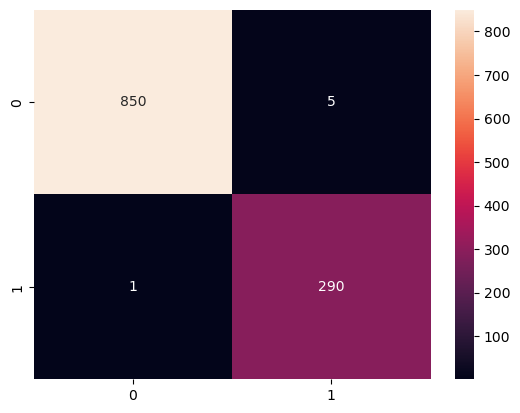

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       855
           1       0.98      1.00      0.99       291

    accuracy                           0.99      1146
   macro avg       0.99      1.00      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [36]:
predictions = voting_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()
print(classification_report(y_test, predictions))

### The voting ensemble seems to have performed the best only misclassifying 5 good emails as spams and 1 spam email as good. 